In [12]:
import pandas as pd
import pdvega
import getpass
from sqlalchemy import create_engine
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
passw = getpass.getpass("Enter Database pasword:")

Enter Database pasword: ······


In [28]:
con = create_engine("postgresql://fccoelho:{}@localhost/DATASUS".format(passw))
dcz = pd.read_sql_query("select dt_diagnostico_sintoma, co_cid, co_uf_residencia, co_municipio_residencia from sinan.tb_notificacao where co_cid in ('A90','A92.0','A92.8');", con)
dcz['dt_diagnostico_sintoma'] = pd.to_datetime(dcz.dt_diagnostico_sintoma, errors='coerce')

In [32]:
dcz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16466005 entries, 0 to 16466004
Data columns (total 4 columns):
dt_diagnostico_sintoma     datetime64[ns]
co_cid                     object
co_uf_residencia           object
co_municipio_residencia    object
dtypes: datetime64[ns](1), object(3)
memory usage: 502.5+ MB


In [99]:
# dcz.reset_index(inplace=True)
grouped = dcz[dcz.dt_diagnostico_sintoma>'2015-01-01'].groupby(['co_cid','co_uf_residencia','dt_diagnostico_sintoma']).count()
df = grouped.reset_index().pivot_table(index='dt_diagnostico_sintoma', 
                                  columns=['co_uf_residencia','co_cid'], values='co_municipio_residencia')\
.fillna(0).resample('W').sum()

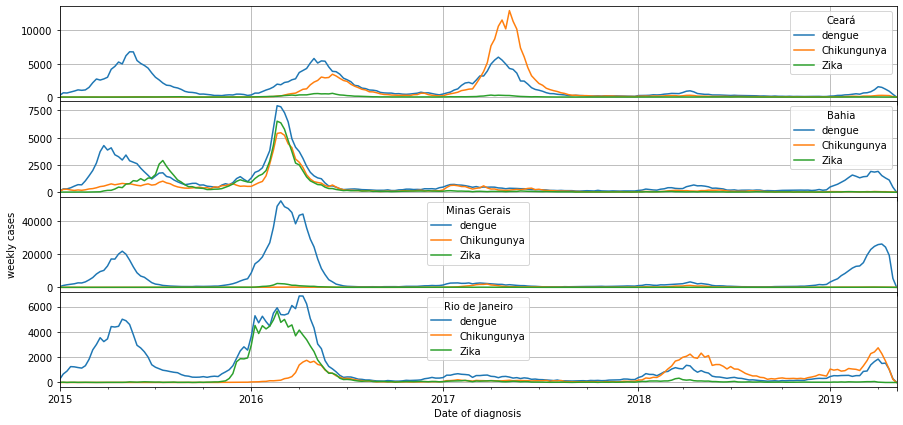

In [106]:
# UF codes: RJ: 33, SP: 35, MG: 31, CE: 23, BA: 29
fig, axs = plt.subplots(4,figsize=(15,7), sharex=True, gridspec_kw={'hspace': 0})
df['23'].plot(ax=axs[0], grid=True);
df['29'].plot(ax=axs[1], grid=True);
df['31'].plot(ax=axs[2], grid=True);
df['33'].plot(ax=axs[3], grid=True, legend=False);

axs[0].legend(['dengue', 'Chikungunya','Zika'], title="Ceará");
axs[1].legend(['dengue', 'Chikungunya','Zika'], title="Bahia");
axs[2].legend(['dengue', 'Chikungunya','Zika'], title="Minas Gerais");
axs[3].legend(['dengue', 'Chikungunya','Zika'], title="Rio de Janeiro");


axs[2].set_ylabel('weekly cases');
axs[3].set_xlabel('Date of diagnosis')
plt.savefig('../figures/dcz_series.png', dpi=300)

In [92]:
grouped.reset_index().pivot_table(index='dt_diagnostico_sintoma', columns=['co_uf_residencia','co_cid'], values='co_municipio_residencia').fillna(0)

co_uf_residencia          11                 12                13              \
co_cid                   A90 A92.0 A92.8    A90 A92.0 A92.8   A90 A92.0 A92.8   
dt_diagnostico_sintoma                                                          
2015-01-02              21.0   0.0   0.0  102.0   0.0   0.0  26.0   0.0   0.0   
2015-01-03              18.0   1.0   0.0  115.0   0.0   0.0  21.0   2.0   0.0   
2015-01-04              23.0   0.0   0.0   94.0   0.0   0.0  32.0   2.0   0.0   
2015-01-05              17.0   0.0   0.0  167.0   0.0   0.0  31.0   0.0   0.0   
2015-01-06               9.0   1.0   0.0   99.0   0.0   0.0  25.0   0.0   0.0   
2015-01-07              16.0   0.0   0.0  104.0   0.0   0.0  22.0   0.0   0.0   
2015-01-08              19.0   0.0   0.0  110.0   0.0   0.0  21.0   0.0   0.0   
2015-01-09              13.0   0.0   0.0  142.0   0.0   0.0  24.0   0.0   0.0   
2015-01-10              24.0   0.0   0.0  140.0   1.0   0.0  30.0   0.0   0.0   
2015-01-11              11.0   0.0   0.0  136.0   0.0   0.0  27.0   1.0   0.0   
2015-01-12              17.0   0.0   0.0  166.0   0.0   0.0  30.0   0.0   0.0   
2015-01-13              16.0   0.0   0.0  109.0   0.0   0.0  22.0   0.0   1.0   
2015-01-14              20.0   0.0   0.0   91.0   0.0   0.0  23.0   0.0   0.0   
2015-01-15              21.0   0.0   0.0  141.0   0.0   0.0  28.0   0.0   0.0   
2015-01-16              26.0   0.0   0.0  120.0   0.0   0.0  26.0   1.0   0.0   
2015-01-17              19.0   0.0   0.0  133.0   0.0   0.0  25.0   1.0   0.0   
2015-01-18              18.0   0.0   1.0  133.0   0.0   0.0  37.0   0.0   0.0   
2015-01-19              22.0   0.0   0.0  156.0   0.0   0.0  34.0   0.0   0.0   
2015-01-20              35.0   0.0   0.0  151.0   1.0   0.0  30.0   4.0   0.0   
2015-01-21              16.0   1.0   0.0  118.0   0.0   0.0  27.0   0.0   0.0   
2015-01-22              25.0   0.0   0.0  104.0   1.0   0.0  34.0   0.0   0.0   
2015-01-23              18.0   0.0   0.0  112.0   1.0   0.0  45.0   0.0   0.0   
2015-01-24              12.0   0.0   0.0   92.0   0.0   0.0  31.0   0.0   0.0   
2015-01-25              18.0   1.0   0.0   92.0   0.0   0.0  32.0   0.0   0.0   
2015-01-26              23.0   0.0   0.0  126.0   0.0   0.0  35.0   0.0   0.0   
2015-01-27              19.0   0.0   0.0   83.0   0.0   0.0  35.0   0.0   0.0   
2015-01-28              24.0   0.0   0.0   88.0   0.0   0.0  24.0   0.0   0.0   
2015-01-29              13.0   0.0   0.0   76.0   0.0   0.0  18.0   0.0   0.0   
2015-01-30              19.0   0.0   0.0  101.0   0.0   0.0  25.0   0.0   0.0   
2015-01-31              19.0   0.0   0.0   71.0   0.0   0.0  21.0   0.0   0.0   
...                      ...   ...   ...    ...   ...   ...   ...   ...   ...   
2019-04-09               4.0   0.0   0.0   28.0   0.0   0.0   6.0   0.0   0.0   
2019-04-10               5.0   2.0   0.0   32.0   0.0   0.0   8.0   2.0   1.0   
2019-04-11               6.0   1.0   0.0   25.0   0.0   0.0   6.0   1.0   0.0   
2019-04-12               4.0   1.0   1.0   20.0   0.0   0.0   9.0   0.0   0.0   
2019-04-13               2.0   0.0   0.0   21.0   0.0   0.0  28.0   1.0   0.0   
2019-04-14               6.0   0.0   0.0   27.0   0.0   0.0  15.0   0.0   0.0   
2019-04-15               8.0   0.0   0.0   32.0   0.0   0.0  13.0   0.0   0.0   
2019-04-16               5.0   0.0   0.0   23.0   0.0   0.0  13.0   2.0   1.0   
2019-04-17               2.0   0.0   0.0   19.0   1.0   0.0  11.0   1.0   1.0   
2019-04-18               9.0   1.0   0.0   17.0   0.0   0.0  10.0   2.0   0.0   
2019-04-19               4.0   0.0   0.0   21.0   0.0   0.0  17.0   0.0   0.0   
2019-04-20               5.0   0.0   0.0   23.0   0.0   0.0  15.0   0.0   0.0   
2019-04-21               7.0   1.0   0.0   25.0   0.0   0.0  23.0   0.0   0.0   
2019-04-22               3.0   0.0   0.0   17.0   0.0   0.0  22.0   0.0   0.0   
2019-04-23               2.0   0.0   0.0   18.0   0.0   0.0  11.0   0.0   0.0   
2019-04-24               3.0   